# The impact of community containment implementation timing <br> on the spread of COVID-19: A simulation study
***
### Attayeb Mohsen and Ahmed Alarabi

Submitted to F1000Research

Due to the big number and size of the simulation raw data files, we included in this repository only the summarized results of the sim



In [4]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from numpy import trim_zeros

Reading summarized data from previous step:

In [5]:
for j in [45, 55, 65, 75, 85, 95]:
    exec('sdf{} = pd.read_csv("Results/sdf{}.csv")'.format(j, j))
    exec('rdf{} = pd.read_csv("Results/rdf{}.csv")'.format(j, j))
    exec('mdf{} = pd.read_csv("Results/mdf{}.csv")'.format(j, j))
    exec('nrdf{} = pd.read_csv("Results/nrdf{}.csv")'.format(j, j))
rdf60 = pd.read_csv('Results/rdf6045.csv')

In [6]:
font_size=14

## Plotting Figure 1
<hr style="border:2px solid black"> </hr>

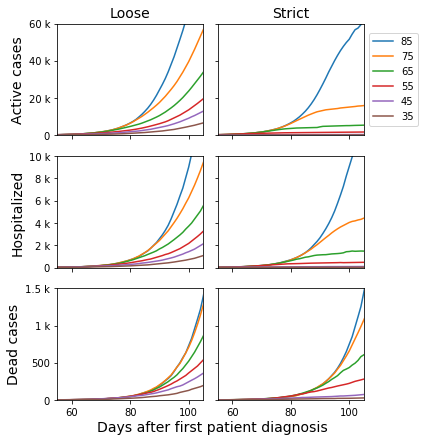

In [7]:

js = [45, 55, 65, 75, 85, 95]
variable = "'active'"
fig, ax = plt.subplots(3,2, figsize=(6, 6))


for j in reversed(js):
    exec("ax[0, 0].plot(mdf{j}['day']-10, mdf{j}[{variable}], "
         "label=int({j})-10)".format(j=str(j), variable=variable))


ax[0, 0].set_xlim([55, 105])
ax[0, 0].set_ylim([0, 60000])
ax[0, 0].set_title("Loose", fontsize=font_size)
ax[0, 0].yaxis.set_major_formatter(ticker.EngFormatter())
ax[0, 0].set_ylabel('Active cases', fontsize=font_size)


for j in reversed(js):
    exec("ax[0,1].plot(sdf{j}['day']-10, sdf{j}[{variable}], "
         "label=int({j})-10)".format(j=str(j), variable=variable))


ax[0, 1].set_title("Strict", fontsize = font_size)

ax[0, 1].set_xlim([55, 105])
ax[0,1].set_ylim([0, 60000])
ax[0,1].yaxis.set_major_formatter(ticker.EngFormatter())


variable = "'hospitalized'"
for j in reversed(js):
    exec("ax[1, 0].plot(mdf{j}['day']-10, mdf{j}[{variable}], "
         "label=int({j})-10)".format(j=str(j), variable=variable))


ax[1,0].set_xlim([55, 105])
ax[1,0].set_ylim([0, 10000])
ax[1,0].set_ylabel("Hospitalized", fontsize=font_size)
ax[1,0].yaxis.set_major_formatter(ticker.EngFormatter())


for j in reversed(js):
    exec("ax[1,1].plot(sdf{j}['day']-10, sdf{j}[{variable}], "
         "label=int({j})-10)".format(j=str(j), variable=variable))

ax[1,1].set_xlim([55, 105])
ax[1,1].set_ylim([0, 10000])
ax[1,1].yaxis.set_major_formatter(ticker.EngFormatter())

variable = "'dead'"

for j in reversed(js):
    exec("ax[2,0].plot(mdf{j}['day']-10, mdf{j}[{variable}], "
         "label=int({j})-10)".format(j=str(j), variable=variable))

ax[2,0].set_xlim([55, 105])
ax[2,0].set_ylim([0, 1500])
ax[2,0].set_ylabel('Dead cases', fontsize=font_size)
ax[2,0].yaxis.set_major_formatter(ticker.EngFormatter())


for j in reversed(js):
    exec("ax[2,1].plot(sdf{j}['day']-10, sdf{j}[{variable}], "
         "label=int({j})-10)".format(j=str(j), variable=variable))

ax[2,1].set_xlim([55, 105])
ax[2,1].set_ylim([0, 1500])

ax[2,1].yaxis.set_major_formatter(ticker.EngFormatter())

ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

for a in ax.flat:
    a.label_outer()

fig.text(0.5, 0, 'Days after first patient diagnosis', ha='center', va='center',
        fontsize=font_size)
fig.tight_layout()


**Figure 1.** Comparing the numbers of active cases, hospitalized,
and deaths of loose versus strict scenario. X
axis shows the day after first patient diagnosis, colored
lines correspond to the day when community
containment starts.


## Plotting Figure 2
<hr style="border:2px solid black"> </hr>

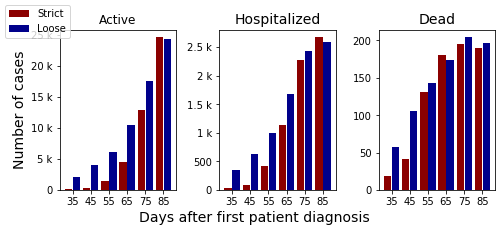

In [8]:
ma = {}
mh = {}
md = {}
sa = {}
sh = {}
sd = {}
for i in [45, 55, 65, 75, 85, 95]:
    ma[i] = eval("mdf{}[mdf{}['day']==100]['active']".format(i, i)).values[0]
    mh[i] = eval("mdf{}[mdf{}['day']==100]['hospitalized']".format(i, i)).values[0]
    md[i] = eval("mdf{}[mdf{}['day']==100]['dead']".format(i, i)).values[0]
    sa[i] = eval("sdf{}[sdf{}['day']==100]['active']".format(i, i)).values[0]
    sh[i] = eval("sdf{}[sdf{}['day']==100]['hospitalized']".format(i, i)).values[0]
    sd[i] = eval("sdf{}[sdf{}['day']==100]['dead']".format(i, i)).values[0]

_df = pd.DataFrame({'ma':ma, 'mh':mh, 'md':md, 'sa':sa, 'sh':sh, 'sd':sd})

_df.index = [x-10 for x in _df.index]

fig, ax = plt.subplots(1,3, figsize=(7, 3))
width=4
bar_space = 0.2
ticks = [x -10 for x in js]
ax[0].bar(x=_df.index-width/2-bar_space, height=_df['sa'], label="Strict", color="darkred", width=width)
ax[0].bar(x=_df.index+width/2+bar_space, height=_df['ma'], label="Loose", color="darkblue", width=width)
ax[0].set_title("Active")
ax[0].set_xticks(ticks)
#ax[0].set_yscale('log')
#ax[0].set_xticklabels(ticks, rotation=90)
ax[0].set_ylabel('Number of cases', fontsize=font_size)
ax[0].yaxis.set_major_formatter(ticker.EngFormatter())


ax[1].bar(x=_df.index-width/2-bar_space, height=_df['sh'], color="darkred", width=width)
ax[1].bar(x=_df.index+width/2+bar_space, height=_df['mh'], color="darkblue", width=width)
ax[1].set_title("Hospitalized", fontsize=font_size)
ax[1].set_xticks(ticks)
#ax[1].set_yscale('log')
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())


ax[2].bar(x=_df.index-width/2-bar_space, height=_df['sd'], color="darkred", width=width)
ax[2].bar(x=_df.index+width/2+bar_space, height=_df['md'], color="darkblue", width=width)
ax[2].set_title("Dead", fontsize=font_size)
ax[2].set_xticks(ticks)
#ax[2].set_yscale('log')
ax[2].yaxis.set_major_formatter(ticker.EngFormatter())


fig.tight_layout()
fig.legend(loc=2)

fig.text(0.5, 0, 'Days after first patient diagnosis', ha='center', va='center',
        fontsize=font_size)
fig.tight_layout()
plt.show()

**Figure 2.** A summary of simulation results at day 90,
x axis represents the start day of the community containment
measures, y axis represents the number of
cases.

## Plotting Figure 3.
<hr style="border:2px solid black"> </hr>

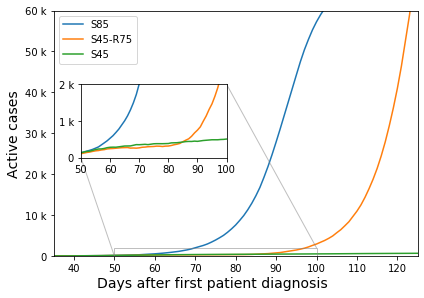

In [9]:
variable = "'active'"
fig, ax = plt.subplots(1,1, figsize=(6,4))

js_r = [55, 95]

ax.plot(rdf95['day']-10, rdf95['active'], label = 'S85')
ax.plot(rdf55['day']-10, rdf55['active'], label = 'S45-R75')
ax.plot(nrdf55['day']-10, nrdf55['active'], label = 'S45')


ax.legend()
ax.set_xlim([35, 125])
ax.set_ylim([0, 60000])

ax.set_ylabel("Active cases", fontsize=font_size)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

axins = ax.inset_axes([0.075, 0.4, 0.4, 0.3])

axins.plot(rdf95['day']-10, rdf95['active'], label = 'S85')
axins.plot(rdf55['day']-10, rdf55['active'], label = 'S45-R75')

axins.plot(nrdf55['day']-10, nrdf55['active'], label = 'S45')

x1, x2, y1, y2 = 50, 100, 0, 2000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.xaxis.set_ticks([50, 60, 70, 80, 90, 100])

axins.yaxis.set_major_formatter(ticker.EngFormatter())
ax.indicate_inset_zoom(axins)

fig.tight_layout()
fig.text(0.5, 0, 'Days after first patient diagnosis', ha='center', va='center', fontsize=font_size)
plt.show()

**Figure 3.** The effect of relaxing community containment
measures on the number of active cases. S85:
starting community containment measures at day 85,
S45-R75: starting community containment at day 45
with relaxation at day 75, S45: starting community
containment at day 45 without relaxation.

## Plotting Figure 4.
<hr style="border:2px solid black"> </hr>

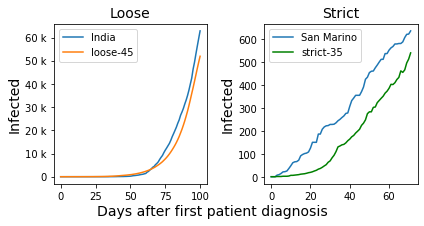

In [11]:
data = pd.read_csv("Results/owid-covid-data.csv")
fig, ax = plt.subplots(1,2, figsize=(6,3))
mdf = pd.read_csv('Results/mdf55.csv')
acu_infected = trim_zeros(list(mdf['acu_infected']))
x='India'
total_cases = trim_zeros(list(data[data['location']==x].reset_index()['total_cases']))
length = len(total_cases) if len(total_cases) < 120 else 120
ax[0].plot(total_cases[:length], label=x)

ax[0].plot(acu_infected[:length], label='loose-45')
ax[0].set_ylabel('Infected', fontsize=font_size)

ax[0].legend()
ax[0].set_title("Loose", fontsize=font_size)

ax[0].yaxis.set_major_formatter(ticker.EngFormatter())

mdf = pd.read_csv('Results/sdf45.csv')
acu_infected = trim_zeros(list(mdf['acu_infected']))

x='San Marino'
total_cases = trim_zeros(list(data[data['location']==x].reset_index()['total_cases']))
length = len(total_cases) if len(total_cases) < 120 else 120
ax[1].plot(total_cases[:length], label=x)
ax[1].plot(acu_infected[:length], label='strict-35', color='green')


ax[1].legend()
#ax[0].set_xlim([55, 105])
#ax[0].set_ylim([0, 10000])
ax[1].set_title("Strict", fontsize=font_size)
ax[1].set_ylabel("Infected", fontsize=font_size)
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())


fig.text(0.5, 0, 'Days after first patient diagnosis', 
         ha='center', va='center', fontsize=font_size)
fig.tight_layout()
plt.savefig('real_data2.pdf', bbox_inches='tight')
plt.show()

## Plotting Figure 5.
<hr style="border:2px solid black"> </hr>

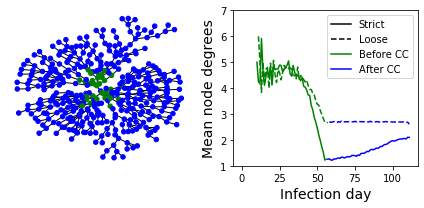

In [12]:
import networkx as nx
import json
import gzip
import matplotlib.gridspec


def load_network(filename, duration=100):
    with gzip.open(filename, "r") as f:
        data = json.load(f)
    nodes = data['detailed_result']
    
    g = nx.Graph()
    g.add_node('73a12531-834a-40cc-8729-b168b956b9bb', parent_id = '')

    for node in nodes:
        if node['events']['infected'] < duration:
            try:
                g.add_node(node['id'], infected=node['events']['infected'], 
                                   diagnosed=node['events']['diagnosed'],
                                   contagious = node['events']['contagious_start'],
                                   parent_id = node['parent_id'])
            except:
                pass

        try:
            g.add_edge(node['parent_id'], node['id'])
        except:
            pass
    return g

g = load_network('Results/T3_strict_3percent_55_2.json.gz', duration=70)
color_list = []

for node in g.nodes(data=True):
    try:
        if node[1]['contagious'] > 55:
            color_list.append('blue')
        else:
            color_list.append('green')
    except:
        color_list.append('blue')
        

loose55 = pd.read_csv("Results/loose_55_Network_degree.csv")
strict55 = pd.read_csv("Results/strict_55_Network_degree.csv")

loose = loose55.groupby('contagious')['degree'].mean()
strict = strict55.groupby('contagious')['degree'].mean()

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
#plt.figure(figsize=(3, 3))
nx.draw_kamada_kawai(g, node_size=20 , node_color=color_list)
plt.subplot(1, 2, 2)

plt.plot(loose.index[:47], loose[:47],  color='green', linestyle ='dashed')
plt.plot(loose.index[47:], loose[47:],  color='blue', linestyle = 'dashed')
plt.plot(strict.index[:47], strict[:47],  color='green')
plt.plot(strict.index[47:], strict[47:],  color='blue')
plt.plot(0, 0, label='Strict', color='black')
plt.plot(0, 0, label='Loose', color='black', linestyle='dashed')
plt.plot(0, 0, label='Before CC', color='green')
plt.plot(0, 0, label='After CC', color='blue')
plt.legend()
plt.ylim([1, 7])
plt.ylabel("Mean node degrees", fontsize=14)
plt.xlabel("Infection day", fontsize = 14)

plt.tight_layout()
plt.show()

**Figure 5.** Simulation network visualization and analysis.
Left panel shows miniature example of built network
graph for strict-55 model. Green colored nodes
are the cases infected prior to introduction of community
containment. Right panel shows the mean of node
degrees, which corresponds to the number of cases got
infected per patient. (CC: community containment).